In [543]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from safe_control_gym.lyapunov.lyapunov import *
from safe_control_gym.lyapunov.utilities import *
from safe_control_gym.experiments.arxiv.utils.gpmpc_plotting_utils import *

In [544]:
dim_grid = 4
grid_constraints = np.array([0.5, 1.5, 1.57, 1.57])
grid_constraints = np.vstack((-1 * grid_constraints, \
                                    grid_constraints)).T
prec = [11, 31, 31, 31]
grids = gridding(dim_grid, grid_constraints, prec)

Grid size: 327701
Discretization constant (tau): 0.0


In [545]:
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print('notebook_dir', notebook_dir)
data_folder = '../data/cartpole_data_eff/'
data_folder_path = os.path.join(notebook_dir, data_folder)
print('data_folder_path', data_folder_path)

notebook_dir /home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils
data_folder_path /home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils/../data/cartpole_data_eff/


In [546]:
M = 1800

M_large = 1800
M_small = 200
M_true = 1000

# M = 'M_{}'.format(M)
data_folder_path_M = os.path.join(data_folder_path, 'M_{}'.format(M))
print('data_folder_path_M', data_folder_path_M)

# find the largest epoch
epoch = 0
for file in os.listdir(data_folder_path_M):
    if file.endswith('.npz'):
        file_epoch = int(file.split('epoch_')[-1].split('_init')[0])
        if file_epoch > epoch:
            epoch = file_epoch
print('largest epoch', epoch)
epoch = 6

data_name_list = os.listdir(data_folder_path_M)
files = [filename for filename in data_name_list if filename.startswith('data_epoch_{}'.format(epoch))]
print('files', files)

init_state_idx = []
for filename in files:
    # split the filename to get the init state index
    init_state_idx.append(int(filename.split('init_')[-1].split('_M')[0]))
sorted_init_state_idx = np.sort(init_state_idx)
print(sorted_init_state_idx)
print('valid init state num:', len(sorted_init_state_idx))

# save the valid init state index to a file

np.savez(os.path.join(notebook_dir, 'init_state_idx_M_{}.npz'.format(M)), \
                                                init_state_idx=sorted_init_state_idx)

# load the valid init state index
init_state_idx_true = np.load(os.path.join(notebook_dir, 'init_state_idx_M_{}.npz'.format(M_true)))['init_state_idx']
init_state_idx_small = np.load(os.path.join(notebook_dir, 'init_state_idx_M_{}.npz'.format(M_small)))['init_state_idx']
init_state_idx_large = np.load(os.path.join(notebook_dir, 'init_state_idx_M_{}.npz'.format(M_large)))['init_state_idx']

common_init_state_idx = np.intersect1d(init_state_idx_true, init_state_idx_small)
print('common init state idx:', common_init_state_idx)
print('common init state num:', len(common_init_state_idx))

data_folder_path_M /home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils/../data/cartpole_data_eff/M_1800
largest epoch 19
files ['data_epoch_6_init_19416_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_153306_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_59398_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_241725_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_215992_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_112875_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_275583_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_46953_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_12279_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_191092_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_297496_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_135363_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz', 'data_epoch_6_init_129774_M

In [547]:
# common_init_state_idx = sorted_init_state_idx
# only load the file with the state index in the sorted_init_state_idx
raw_data = []
for filename in files:
    init_idx = int(filename.split('init_')[-1].split('_M')[0])
    if init_idx in common_init_state_idx:
        raw_data.append(np.load(os.path.join(data_folder_path_M, filename), allow_pickle=True))
raw_data

[NpzFile '/home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils/../data/cartpole_data_eff/M_1800/data_epoch_6_init_153306_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz' with keys: train_runs, test_runs, num_epochs, num_train_episodes_per_epoch, num_test_episodes_per_epoch...,
 NpzFile '/home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils/../data/cartpole_data_eff/M_1800/data_epoch_6_init_59398_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz' with keys: train_runs, test_runs, num_epochs, num_train_episodes_per_epoch, num_test_episodes_per_epoch...,
 NpzFile '/home/mingxuan/Repositories/scg_mx/safe_control_gym/experiments/arxiv/cartpole_performance/utils/../data/cartpole_data_eff/M_1800/data_epoch_6_init_241725_M_1.8_m_0.1_l_0.5_prec_11_31_31_31.npz' with keys: train_runs, test_runs, num_epochs, num_train_episodes_per_epoch, num_test_episodes_per_epoch...,
 NpzFile '/home/mingxuan/Repositories/scg_mx/safe_control_gym/

In [548]:
test_runs = [raw_data[i]['test_runs'].item() for i in range(len(raw_data))]
train_runs = [raw_data[i]['train_runs'].item() for i in range(len(raw_data))]

In [549]:
# test_runs
num_points_per_epoch = []  # number of training points
# Compute the number of training points (x-axis for most figures).
num_epochs = len(train_runs[0])
print('num_epochs:', num_epochs)
num_points = 0
num_points_per_epoch.append(num_points)
for epoch in range(1, num_epochs):
    num_train_episodes = len(train_runs[1][epoch])
    for episode in range(num_train_episodes):
        num_points += train_runs[1][epoch][episode]['obs'].shape[0]
    num_points_per_epoch.append(num_points) 
print('num_points_per_epoch:', num_points_per_epoch)

num_epochs: 7
num_points_per_epoch: [0, 45, 82, 132, 182, 228, 273]


mean_cost: [71342.30550448  2592.91660674  2027.53077794  2537.66277741
 12087.29713901 12904.41633156  2418.01282738]
std_cost: [81043.4205106   1412.58331884  1143.49440461  2291.00205239
 24071.67648298 22241.82699546  1931.28104125]


(0.0, 249637.83062779717)

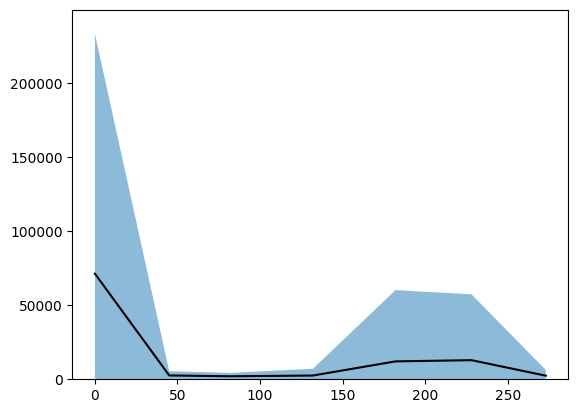

In [550]:
s = 2 # times of std

common_costs = [get_cost(test_runs[i]) for i in range(len(test_runs))]
# num_points_per_epoch
# common_costs

mean_cost = np.mean(common_costs, axis=0)
print('mean_cost:', mean_cost)
std_cost = np.std(common_costs, axis=0)
print('std_cost:', std_cost)
x = num_points_per_epoch
plt.plot(x, mean_cost, 'k-')
plt.fill_between(x, mean_cost - s * std_cost, mean_cost + s * std_cost, alpha=0.5)
# limit the y-axis above 0
plt.ylim(0, None)

In [551]:
# save the mean_cost and std_cost to a file under the notebook_dir
np.savez('mean_std_cost_M_{}.npz'.format(M), mean_cost=mean_cost, std_cost=std_cost, num_points_per_epoch=num_points_per_epoch)